# Problem Statement -  Predict a price range of mobiles using other varibles

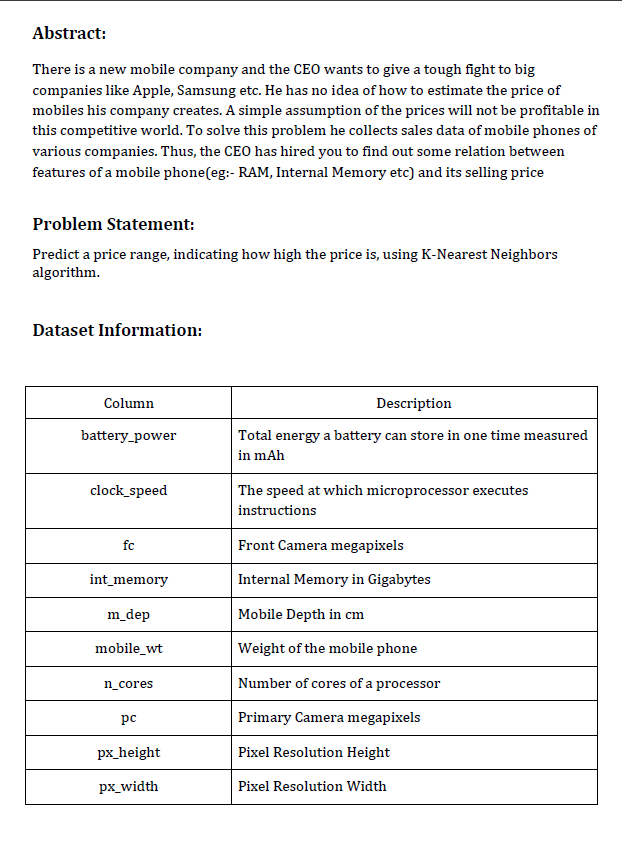

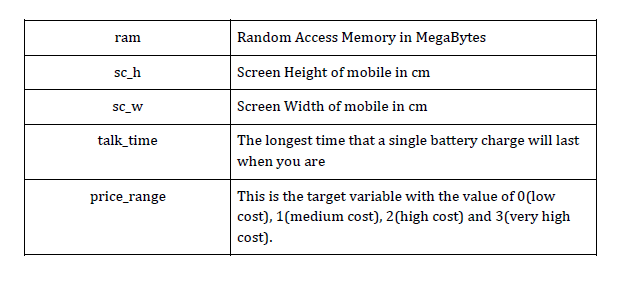

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv("D:/Imarticus/Datasets/Mobile_data.csv")

In [4]:
df.sample(10)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
468,765,2.9,0,18,0.1,153,7,0,6,793,1066,11,1,16,0
1410,856,1.9,0,14,0.6,115,1,7,395,1027,2439,6,3,12,1
1006,919,0.5,11,13,0.3,159,1,15,275,570,1028,8,4,17,0
583,1813,0.6,0,5,0.2,198,3,8,338,1306,759,9,3,14,0
1925,1830,0.5,5,14,0.8,160,6,6,773,1353,1905,16,3,19,2
1148,727,1.5,0,32,1.0,131,7,1,813,1377,1891,19,13,7,1
556,1552,1.2,10,53,0.3,180,8,18,430,658,2606,13,6,12,2
870,1673,2.8,7,9,0.1,187,3,10,65,734,3669,9,1,10,3
72,605,1.0,8,9,0.1,142,3,16,160,1026,392,15,6,4,0
1397,717,1.1,2,14,0.1,99,8,6,1878,1981,629,16,15,20,0


In [5]:
df.shape

(2000, 15)

In [6]:
df.describe(include='all')

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [7]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [8]:
for i in df.columns:
    print(i,'-',df[i].unique())

battery_power - [ 842 1021  563 ... 1139 1467  858]
clock_speed - [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
fc - [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
int_memory - [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep - [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt - [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 193 169 120 149 186 122 167]


## Data cleaning

In [9]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

### No missing values 

In [10]:
duplicates = df.duplicated()
duplicates.sum()

0

### No duplicates

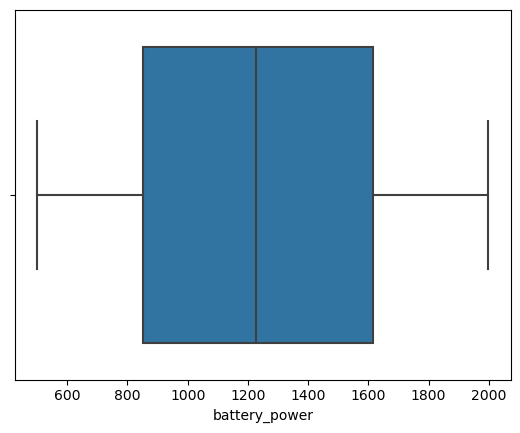

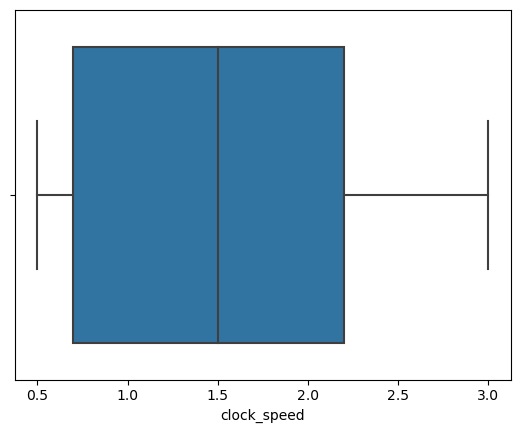

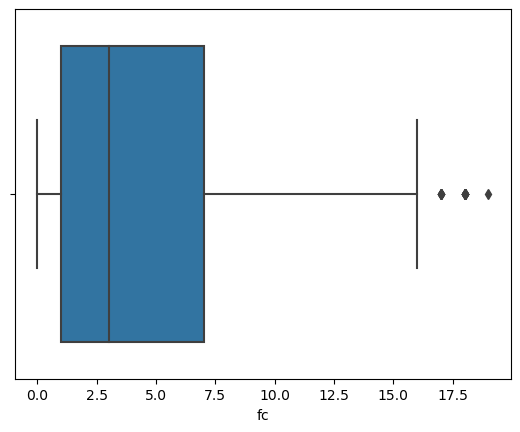

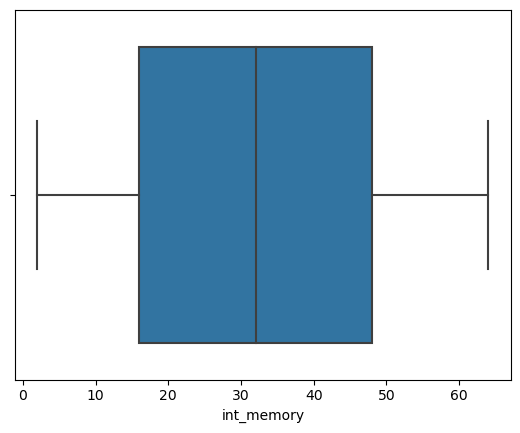

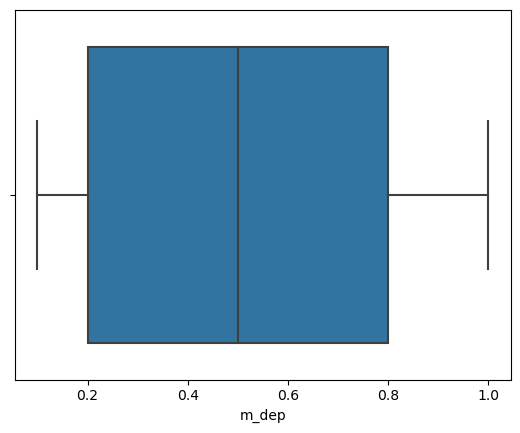

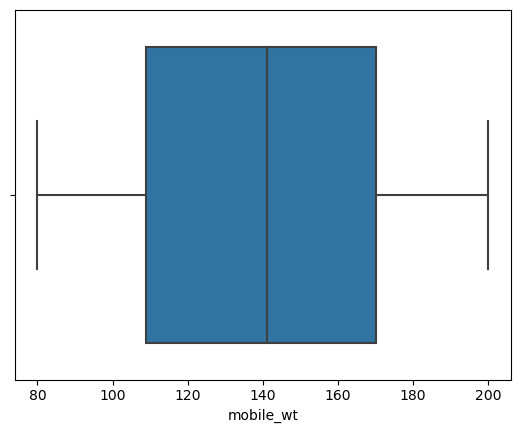

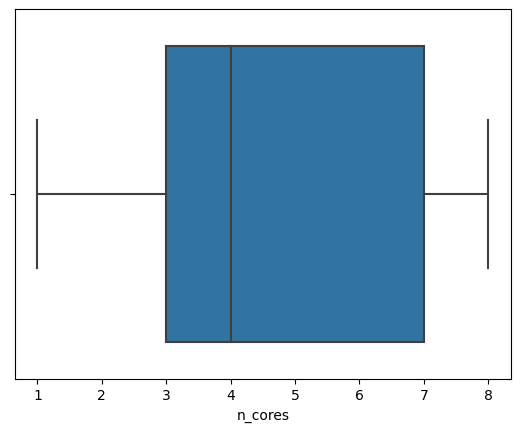

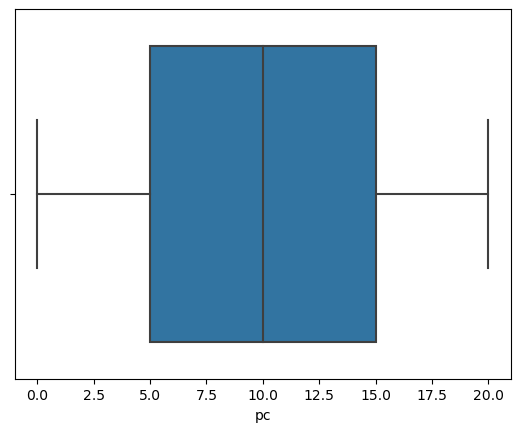

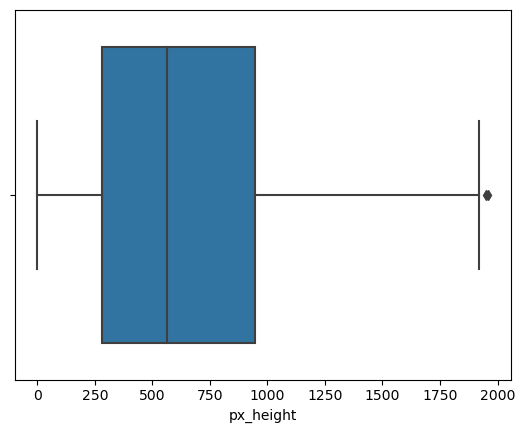

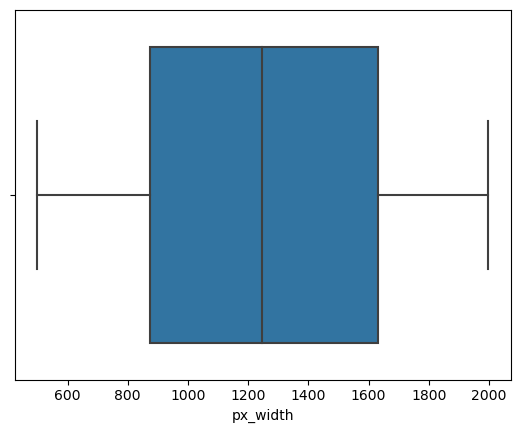

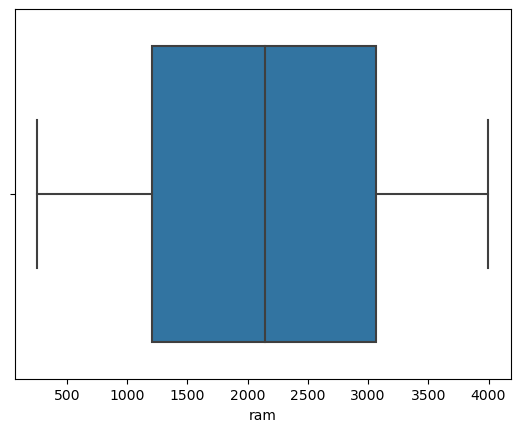

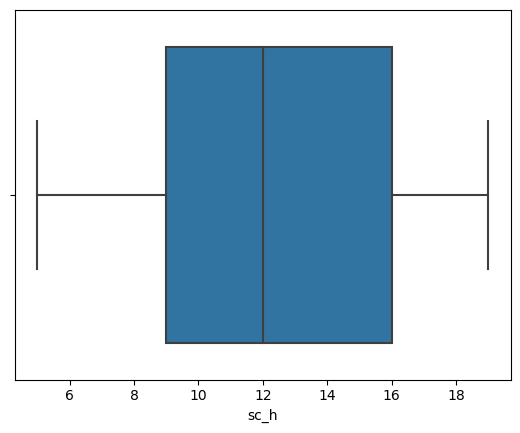

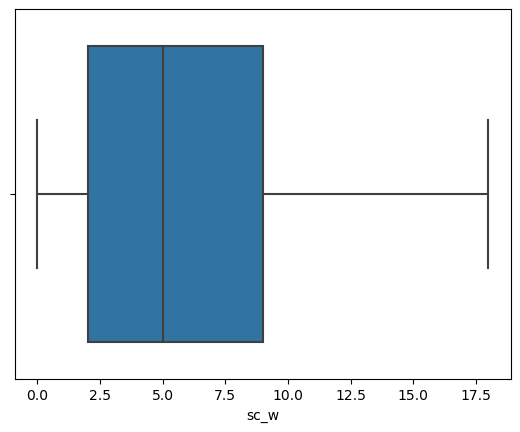

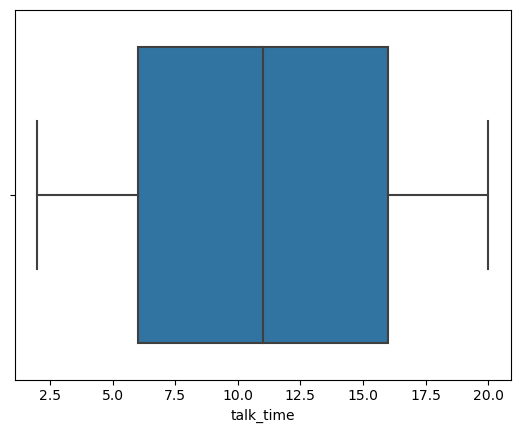

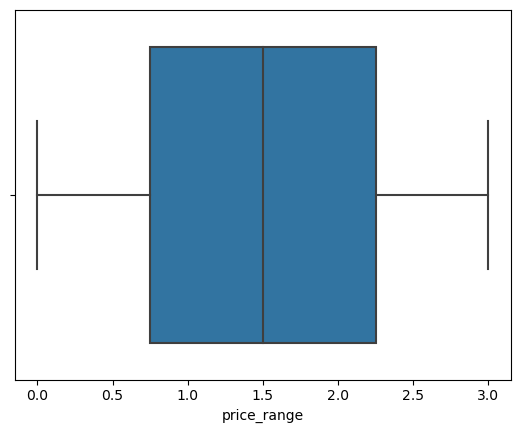

<Figure size 640x480 with 0 Axes>

In [11]:
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.figure()

In [12]:
def remove_outliers(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    low = q1-(1.5*IQR)
    high = q3+(1.5*IQR)
    return low,high

<Axes: xlabel='fc'>

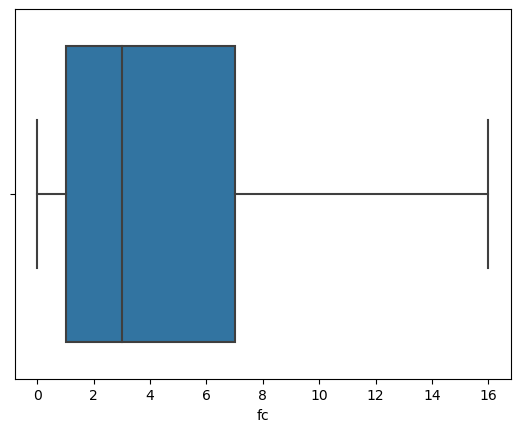

In [13]:
low,high = remove_outliers(df['fc'])
df['fc'] = np.where(df['fc']<low,low,df['fc'])
df['fc'] = np.where(df['fc']>high,high,df['fc'])
sns.boxplot(df,x='fc')

<Axes: xlabel='px_height'>

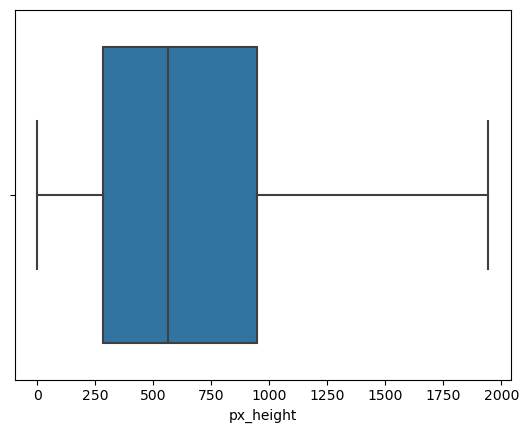

In [14]:
low,high = remove_outliers(df['px_height'])
df['px_height'] = np.where(df['px_height']<low,low,df['px_height'])
df['px_height'] = np.where(df['px_height']>high,high,df['px_height'])
sns.boxplot(df,x='px_height')

In [15]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

## Data Visualization

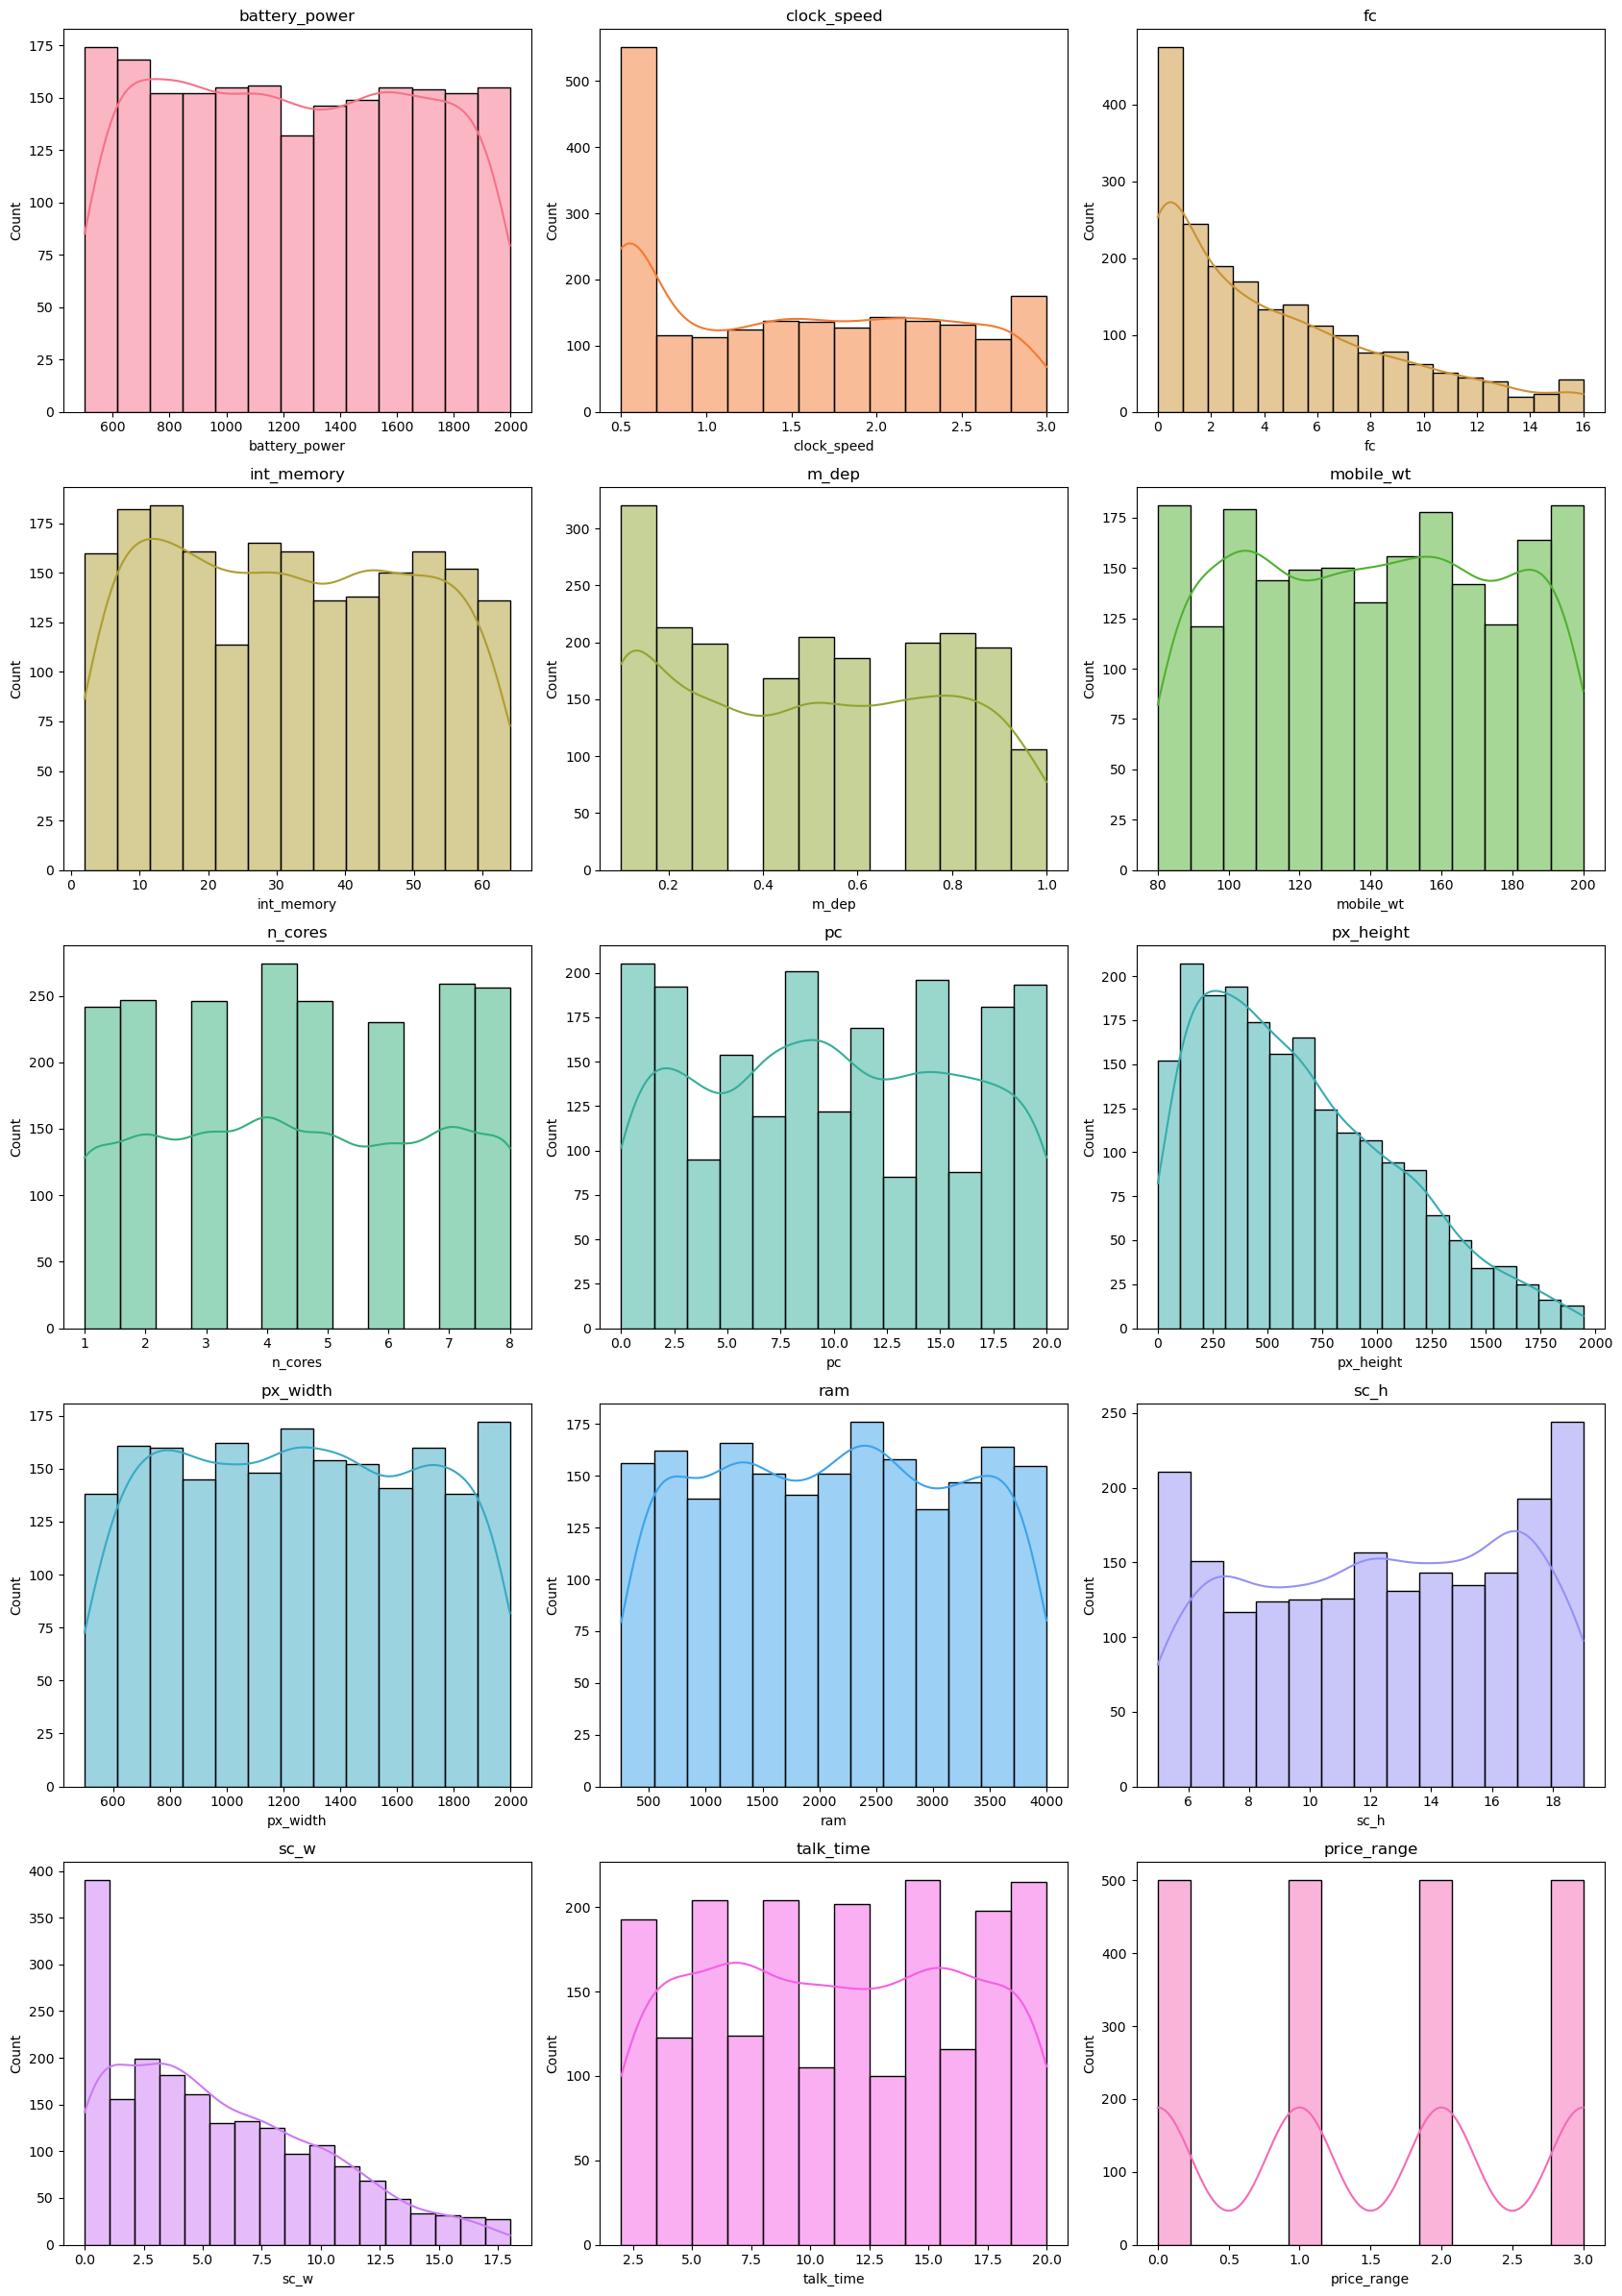

In [16]:
num_columns = df.shape[1]
num_rows = 5
num_cols = (num_columns + num_rows - 1) // num_rows

# Define a list of colors
colors = sns.color_palette('husl', num_columns)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(17, 24))

for i, column in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df, x=column, kde=True, color=colors[i], line_kws={'color': 'black'}, ax=ax)
    ax.set_title(column)


# Remove empty subplots
if num_columns < num_rows * num_cols:
    for j in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

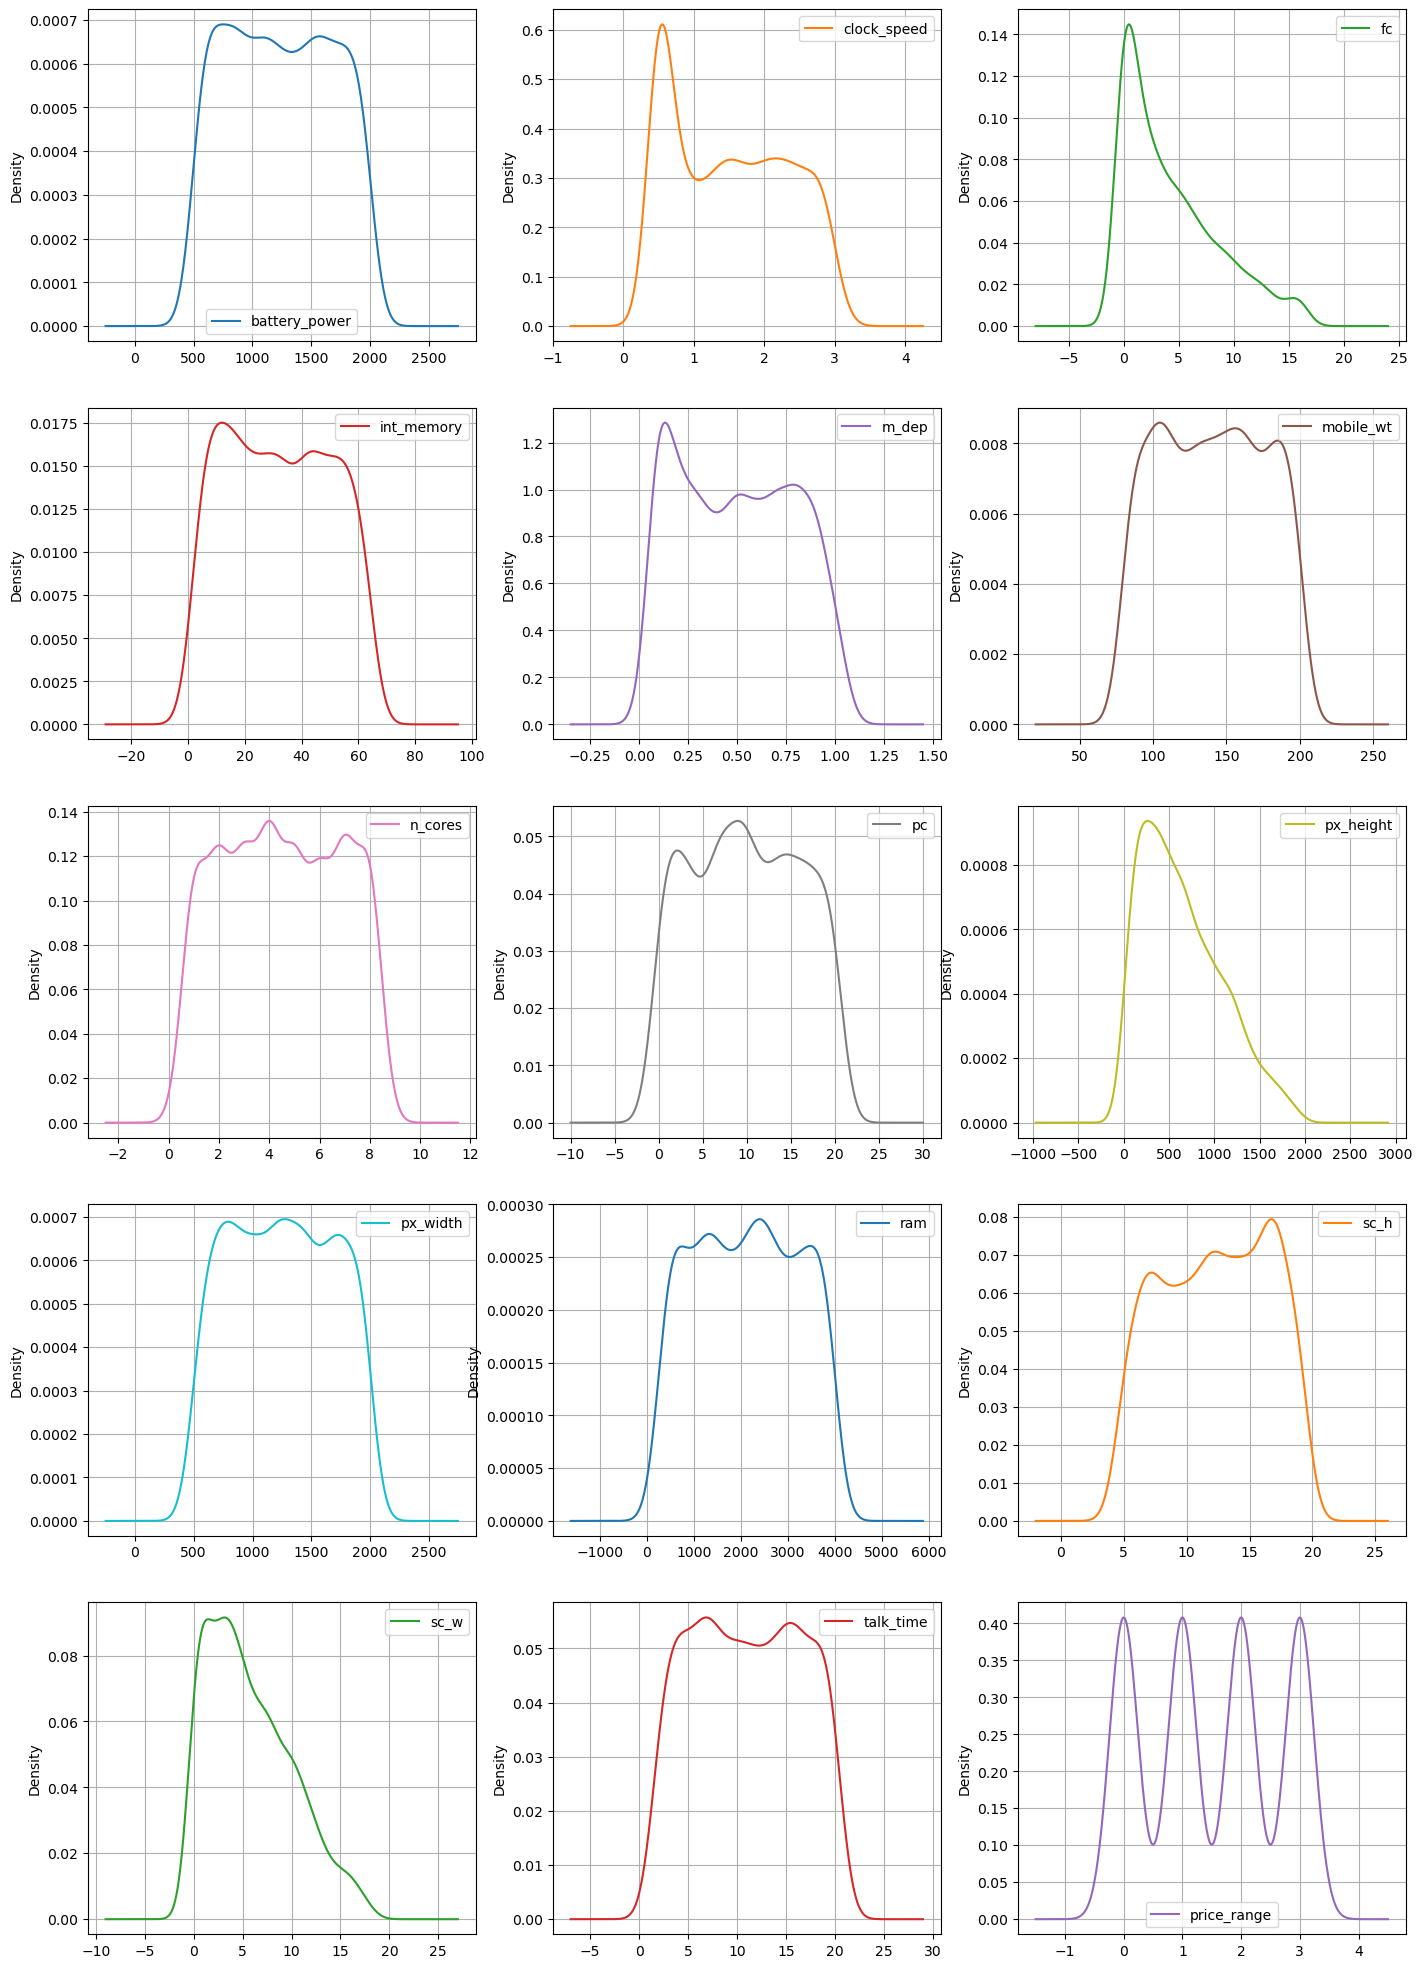

In [17]:
colors = sns.color_palette("tab10")

df.plot(kind='density',subplots=True, layout=(5,3), sharex=False, sharey=False , figsize =(17,25) , color = colors, grid = True )

plt.show()

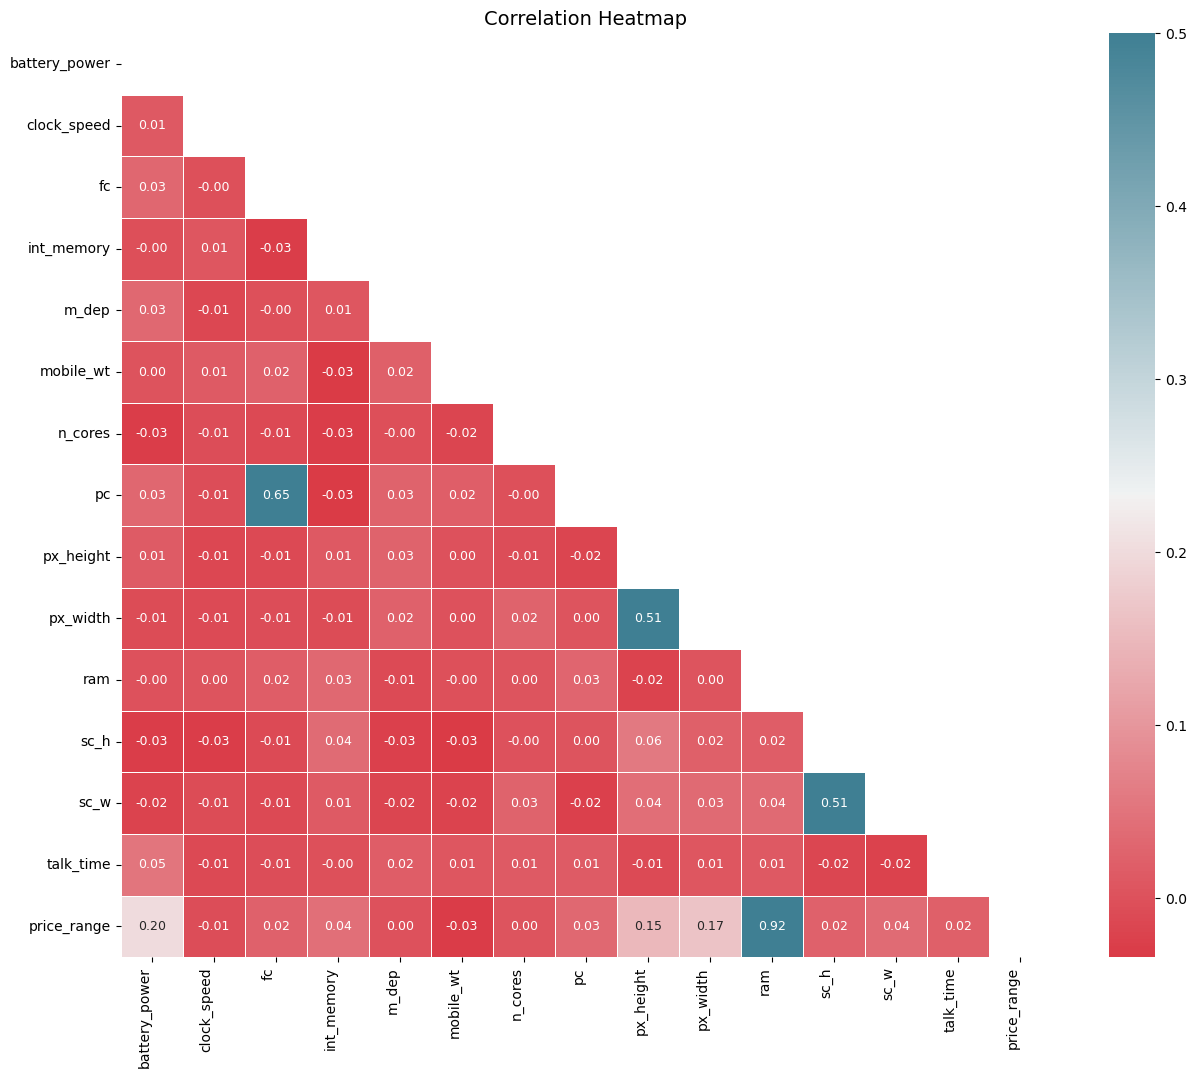

In [18]:
plt.figure(figsize=(15, 12))  # Set the figure size
colormap = sns.diverging_palette(10, 220, as_cmap = True)

# Create a mask for the upper triangle
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap=colormap, annot=True, fmt=".2f", linewidths=0.5, vmax=0.5, annot_kws={'fontsize':9})
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.show()

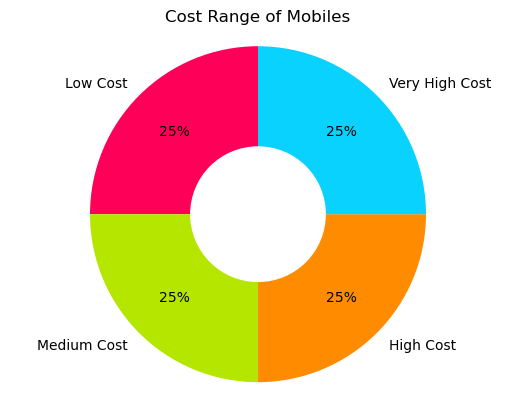

In [19]:
freq = df['price_range'].value_counts()
counts = freq.to_list()
colors=["#ff0059","#b4e600","#ff8c00","#0ad2ff"]
plt.pie(x=counts,labels=['Low Cost','Medium Cost','High Cost','Very High Cost'],autopct='%1.0f%%',colors=colors,startangle=90, pctdistance=0.70)
circle = plt.Circle(xy=(0,0),radius=0.4,color='white')
plt.gcf()
plt.gca().add_artist(circle)
plt.axis('equal')
plt.title("Cost Range of Mobiles")
plt.show()

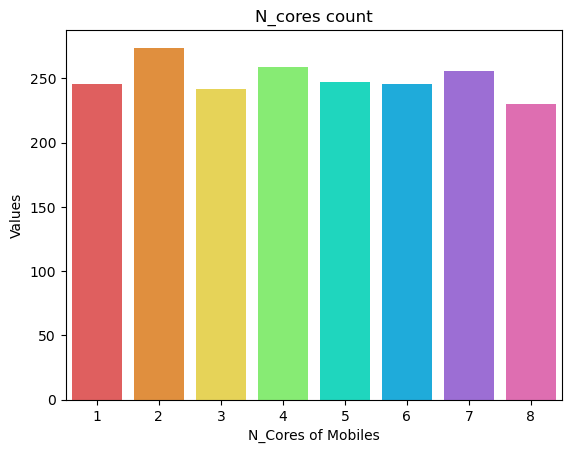

In [20]:
colors=["#f44a4a","#fb8f23","#fee440","#7aff60","#00f5d4","#00bbf9","#9b5de5","#f15bb5"]
sns.barplot(x=df['n_cores'], y=df['n_cores'].value_counts(),palette=colors)
plt.xlabel('N_Cores of Mobiles')
plt.ylabel('Values')
plt.title('N_cores count')
plt.show()

## Standardization

In [21]:
std = StandardScaler()
std

StandardScaler()

In [22]:
df1=df.copy()
cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time']

for i in cols:
    df1[i] = std.fit_transform(df1[[i]])

In [23]:
df1.sample(10)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
35,-1.168925,-0.272432,2.725529,1.540887,-0.352878,0.558083,1.521249,1.168355,1.102028,-0.005822,-0.736046,-0.547577,-0.405712,0.730240,1
189,1.348669,-0.149853,-0.534116,0.603792,1.381165,0.275524,0.209639,-0.810929,-0.076859,0.299669,1.576624,1.114266,0.283103,0.364113,3
869,-0.005733,1.566254,0.397211,-0.002563,-0.699686,0.077732,-0.227564,1.333295,-0.345095,0.350584,-1.090139,0.876859,1.431127,0.547176,0
437,0.531475,1.566254,-0.766948,0.217930,-0.006069,-0.289595,0.646842,0.013773,1.818827,1.139769,-1.050488,-0.072765,1.201522,-0.734267,1
1861,-0.112719,0.463042,0.164379,-1.380644,-0.006069,0.671107,-1.101971,1.663176,-1.276032,-1.473104,-1.183273,0.164641,0.971917,-0.002014,0
1756,1.423787,0.463042,-0.534116,1.375517,-1.393304,1.151457,0.646842,-0.645989,1.428870,1.253171,1.347939,1.589078,0.742313,-0.551204,3
324,1.045920,0.708200,0.164379,-0.774288,1.381165,0.558083,0.646842,1.663176,-0.635872,-0.595975,-1.224768,0.164641,-0.635317,0.547176,0
1748,-0.688625,0.953358,0.164379,1.375517,-1.046495,-0.317851,-1.101971,-0.645989,0.026829,-0.725577,-0.069355,-0.072765,0.512708,-1.100394,1
628,0.274253,-1.253064,-0.766948,1.430640,-0.006069,-0.939481,0.646842,-1.140810,-0.448783,-0.811207,-0.966575,0.876859,0.512708,-1.283457,0
1379,-1.064215,1.688833,-0.534116,1.651133,0.687548,-0.967737,-1.539175,-0.316108,2.398127,1.225399,-0.457567,-0.784983,-0.635317,-0.917331,1


## Model Building

In [24]:
df1.shape

(2000, 15)

## Logistic Regression with scaling

In [25]:
X1 = df1.drop('price_range',axis=1)
y1 = df1['price_range']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.30,random_state=0)

In [27]:
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

LogisticRegression()

In [28]:
model_1.score(X_train,y_train)

0.975

In [29]:
model_1.score(X_test,y_test)

0.9666666666666667

In [30]:
prediction = model_1.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

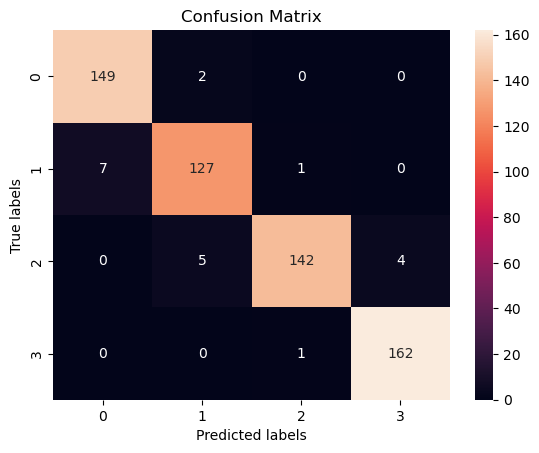

In [31]:
cm = confusion_matrix(y_test, prediction)


sns.heatmap(cm, annot=True, fmt="d")


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')


In [32]:
accuracy_score(y_test,prediction)

0.9666666666666667

In [33]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       151
           1       0.95      0.94      0.94       135
           2       0.99      0.94      0.96       151
           3       0.98      0.99      0.98       163

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



## KNN Classifier with scaling

In [34]:
X2 = df1.drop('price_range',axis=1)
y2 = df1['price_range']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.30,random_state=0)

In [36]:
model_2 = KNeighborsClassifier(n_neighbors=164,p=1)
model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=164, p=1)

In [37]:
model_2.score(X_train,y_train)

0.8121428571428572

In [38]:
model_2.score(X_test,y_test)

0.8116666666666666

In [39]:
model_2 = KNeighborsClassifier(n_neighbors=81)
model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=81)

In [40]:
model_2.score(X_train,y_train)

0.71

In [41]:
model_2.score(X_test,y_test)

0.7166666666666667

In [42]:
prediction = model_2.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

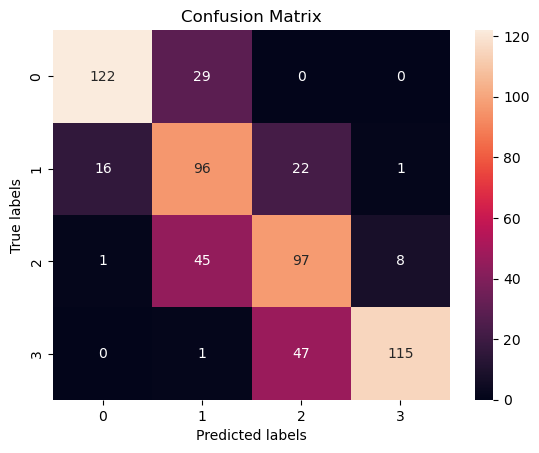

In [43]:
cm = confusion_matrix(y_test, prediction)


sns.heatmap(cm, annot=True, fmt="d")


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [44]:
accuracy_score(y_test,prediction)

0.7166666666666667

In [45]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       151
           1       0.56      0.71      0.63       135
           2       0.58      0.64      0.61       151
           3       0.93      0.71      0.80       163

    accuracy                           0.72       600
   macro avg       0.74      0.72      0.72       600
weighted avg       0.75      0.72      0.72       600



## KNN Classifier without scaling

In [46]:
X3 = df.drop('price_range',axis=1)
y3 = df['price_range']

In [47]:
X3.shape

(2000, 14)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.30,random_state=0)

In [49]:
X_train.shape,X_test.shape

((1400, 14), (600, 14))

In [50]:
model_3 = KNeighborsClassifier(n_neighbors=9)
model_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [51]:
model_3.score(X_train,y_train)

0.9464285714285714

In [52]:
model_3.score(X_test,y_test)

0.94

In [53]:
prediction3 = model_3.predict(X_test)

In [54]:
accuracy_score(y_test,prediction3)

0.94

## Confusion matrix

In [55]:
cm = confusion_matrix(y_test, prediction3)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[151   0   0   0]
 [  7 125   3   0]
 [  0   7 135   9]
 [  0   0  10 153]]


In [56]:
def calculate_confusion_matrix(y_true, y_pred, num_classes):
    
    # Initialize TP, TN, FP, FN for each class
    TP = [0] * num_classes
    TN = [0] * num_classes
    FP = [0] * num_classes
    FN = [0] * num_classes

    # Iterate through each instance
    for true_label, pred_label in zip(y_true, y_pred):
        # Update the corresponding counts based on true and predicted labels
        for i in range(num_classes):
            if pred_label == i and true_label == i:
                TP[i] += 1
            elif pred_label != i and true_label != i:
                TN[i] += 1
            elif pred_label == i and true_label != i:
                FP[i] += 1
            elif pred_label != i and true_label == i:
                FN[i] += 1

    return TP, TN, FP, FN


In [57]:
TP, TN, FP, FN = calculate_confusion_matrix(y_test, prediction3,4)

# Print the results
for i in range(4):
    print(f"Class {i} - TP: {TP[i]}, TN: {TN[i]}, FP: {FP[i]}, FN: {FN[i]}")

Class 0 - TP: 151, TN: 442, FP: 7, FN: 0
Class 1 - TP: 125, TN: 458, FP: 7, FN: 10
Class 2 - TP: 135, TN: 436, FP: 13, FN: 16
Class 3 - TP: 153, TN: 428, FP: 9, FN: 10


Text(0.5, 1.0, 'Confusion Matrix')

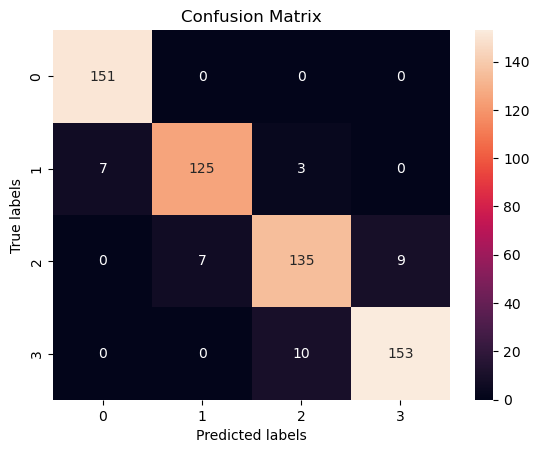

In [58]:
cm = confusion_matrix(y_test, prediction3)


sns.heatmap(cm, annot=True, fmt="d")


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [59]:
TP,TN,FP,FN

([151, 125, 135, 153], [442, 458, 436, 428], [7, 7, 13, 9], [0, 10, 16, 10])

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       151
           1       0.95      0.93      0.94       135
           2       0.91      0.89      0.90       151
           3       0.94      0.94      0.94       163

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [61]:
classification_accuracy =[0]*4

for i in range(4):
    classification_accuracy[i] = (TP[i] + TN[i]) / float(TP[i] + TN[i] + FP[i] + FN[i])
    print(f'Classification accuracy {i} : {format(classification_accuracy[i])}')
          

Classification accuracy 0 : 0.9883333333333333
Classification accuracy 1 : 0.9716666666666667
Classification accuracy 2 : 0.9516666666666667
Classification accuracy 3 : 0.9683333333333334


In [62]:
classification_error =[0]*4

for i in range(4):
    classification_error[i] = (FP[i] + FN[i]) / float(TP[i] + TN[i] + FP[i] + FN[i])
    print(f'Classification error {i} : {format(classification_error[i])}')
          

Classification error 0 : 0.011666666666666667
Classification error 1 : 0.028333333333333332
Classification error 2 : 0.04833333333333333
Classification error 3 : 0.03166666666666667


In [63]:
precision =[0]*4

for i in range(4):
    precision[i] = TP[i] / float(TP[i] + FP[i])
    print(f'Precision {i} : {format(precision[i])}')
          

Precision 0 : 0.9556962025316456
Precision 1 : 0.946969696969697
Precision 2 : 0.9121621621621622
Precision 3 : 0.9444444444444444


In [64]:
recall =[0]*4

for i in range(4):
    recall[i] = TP[i] / float(TP[i] + FN[i])
    print(f'Recall {i} : {format(recall[i])}')
          

Recall 0 : 1.0
Recall 1 : 0.9259259259259259
Recall 2 : 0.8940397350993378
Recall 3 : 0.9386503067484663


In [65]:
true_positive_rate =[0]*4

for i in range(4):
    true_positive_rate[i] = TP[i] / float(TP[i] + FN[i])
    print(f'True Positive Rate {i} : {format(true_positive_rate[i])}')
          

True Positive Rate 0 : 1.0
True Positive Rate 1 : 0.9259259259259259
True Positive Rate 2 : 0.8940397350993378
True Positive Rate 3 : 0.9386503067484663


In [66]:
false_positive_rate =[0]*4

for i in range(4):
    false_positive_rate[i] = FP[i] / float(FP[i] + TN[i])
    print(f'False Positive Rate {i} : {format(false_positive_rate[i])}')
          

False Positive Rate 0 : 0.015590200445434299
False Positive Rate 1 : 0.015053763440860216
False Positive Rate 2 : 0.028953229398663696
False Positive Rate 3 : 0.020594965675057208


In [67]:
specificity =[0]*4

for i in range(4):
    specificity[i] = TN[i] / (TN[i] + FP[i])
    print(f'Specificity {i} : {format(specificity[i])}')

Specificity 0 : 0.9844097995545658
Specificity 1 : 0.9849462365591398
Specificity 2 : 0.9710467706013363
Specificity 3 : 0.9794050343249427


C:\Users\dell\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


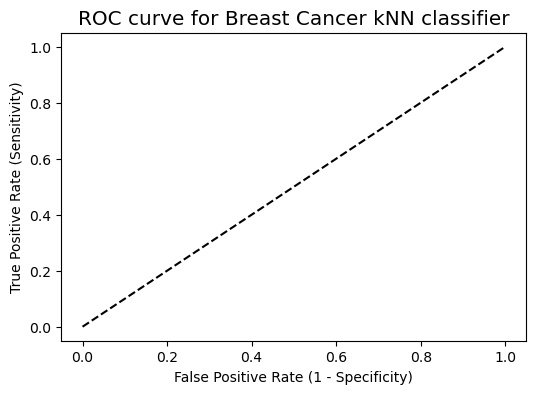

In [68]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Cross Validation method with scaling

In [69]:
neighbors=list(range(1,100,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X1,y1,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [70]:
MSE=[1-x for x in cv_scores]
MSE

[0.4595,
 0.45799999999999996,
 0.40549999999999997,
 0.38849999999999996,
 0.37,
 0.3560000000000001,
 0.3434999999999999,
 0.3404999999999999,
 0.33100000000000007,
 0.33199999999999996,
 0.32700000000000007,
 0.32499999999999996,
 0.31699999999999995,
 0.3185,
 0.3215000000000001,
 0.32099999999999995,
 0.31999999999999995,
 0.3084999999999999,
 0.3045,
 0.31100000000000005,
 0.30400000000000005,
 0.30499999999999994,
 0.3105,
 0.30499999999999994,
 0.3015000000000001,
 0.3045,
 0.30300000000000005,
 0.3025,
 0.3065,
 0.2954999999999999,
 0.3005,
 0.30099999999999993,
 0.30400000000000005,
 0.30100000000000005,
 0.29799999999999993,
 0.3015,
 0.30100000000000005,
 0.2925000000000001,
 0.29000000000000015,
 0.28800000000000003,
 0.28600000000000003,
 0.28800000000000003,
 0.2905000000000001,
 0.2865,
 0.29499999999999993,
 0.2875,
 0.2905000000000001,
 0.29300000000000004,
 0.29699999999999993,
 0.2985]

In [71]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

81

Text(0, 0.5, 'Error')

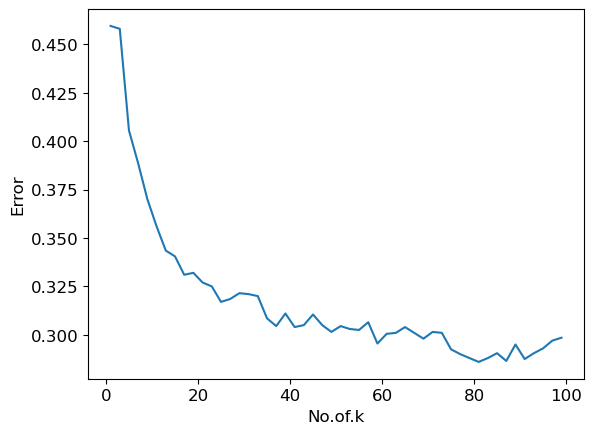

In [72]:
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.30,random_state=0)

In [74]:
model_4 = KNeighborsClassifier(n_neighbors=optimal_k)
model_4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=81)

In [75]:
model_4.score(X_train,y_train)

0.71

In [76]:
model_4.score(X_test,y_test)

0.7166666666666667

## Cross Validation method without scaling

In [77]:
neighbors=list(range(1,100,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_test,y_test,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [78]:
MSE=[1-x for x in cv_scores]
MSE

[0.4883333333333333,
 0.46499999999999997,
 0.42333333333333334,
 0.4066666666666666,
 0.3933333333333333,
 0.395,
 0.40333333333333343,
 0.41333333333333333,
 0.3983333333333332,
 0.3933333333333333,
 0.4,
 0.3866666666666666,
 0.39,
 0.375,
 0.3783333333333333,
 0.3716666666666666,
 0.3699999999999999,
 0.3866666666666666,
 0.3716666666666667,
 0.375,
 0.3899999999999999,
 0.3833333333333332,
 0.3866666666666667,
 0.3933333333333333,
 0.3899999999999999,
 0.3866666666666667,
 0.3916666666666666,
 0.3933333333333333,
 0.3883333333333333,
 0.3899999999999999,
 0.3800000000000001,
 0.3699999999999999,
 0.3683333333333334,
 0.3799999999999999,
 0.375,
 0.3766666666666666,
 0.3783333333333332,
 0.3733333333333333,
 0.3699999999999999,
 0.3533333333333333,
 0.3566666666666667,
 0.3550000000000001,
 0.3633333333333334,
 0.3550000000000001,
 0.3516666666666667,
 0.3633333333333333,
 0.365,
 0.365,
 0.3566666666666667,
 0.3633333333333334]

In [79]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

89

Text(0, 0.5, 'Error')

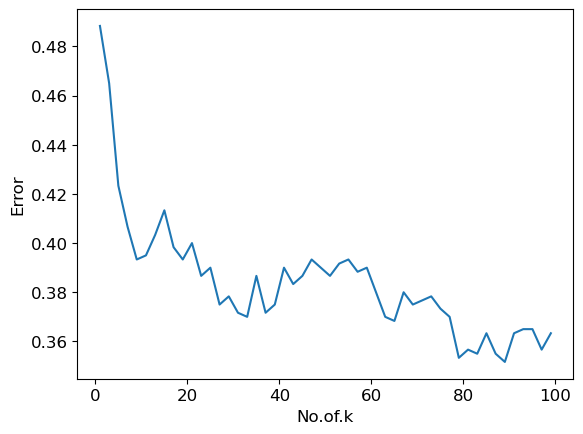

In [80]:
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

NameError: name 'X' is not defined

In [ ]:
model_5 = KNeighborsClassifier(n_neighbors=optimal_k)
model_5.fit(X_train,y_train)

In [ ]:
model_5.score(X_train,y_train)

In [ ]:
model_5.score(X_test,y_test)

In [ ]:
X_train.shape

In [ ]:
neighbors=list(range(1,50))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,p=1)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
MSE=[1-x for x in cv_scores]


In [ ]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

In [ ]:
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
model_6 = KNeighborsClassifier(n_neighbors=optimal_k,p=1)
model_6.fit(X_train,y_train)

In [ ]:
model_6.score(X_train,y_train)

In [ ]:
model_6.score(X_test,y_test)

In [ ]:
prediction = model_6.predict(X_test)

In [ ]:
accuracy_score(y_test, prediction)

# Decision Tree

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.30,random_state=0)

model_9 = DecisionTreeClassifier()
model_9.fit(X_train,y_train)

print('train -',model_9.score(X_train,y_train))
print('test -',model_9.score(X_test,y_test))

In [ ]:
model_10 = DecisionTreeClassifier(criterion="entropy")
model_10.fit(X_train,y_train)

print('train -',model_10.score(X_train,y_train))
print('test -',model_10.score(X_test,y_test))

In [ ]:
#for i in range(3,11):
model_11 = DecisionTreeClassifier(criterion="entropy",max_depth=3)
model_11.fit(X_train,y_train)
#print(i)
print('train -',model_11.score(X_train,y_train))
print('test -',model_11.score(X_test,y_test),'\n')

In [ ]:
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

 http://webgraphviz.com/ - to visualize the decision tree run below code thn open .dot file created after running below code then copy and paste in this link

In [ ]:
train_char_label = ['0', '1','2','3']
Credit_Tree_File = open('mobile.dot','w')
dot_data = tree.export_graphviz(model_10, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [ ]:
train_char_label = ['0', '1','2','3']
Credit_Tree_File = open('mobile1.dot','w')
dot_data = tree.export_graphviz(model_11, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()